In [33]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras import regularizers

In [199]:
input_dim = 784
input_img = Input(shape=(input_dim,))
hidden_dim = 100
encoding_dim = int(input_dim / 2.5)
learning_rate = 1e-7

In [200]:
encoded = Dense(encoding_dim, activation="tanh")(input_img)
encoded = Dense(hidden_dim, activation="relu")(encoded)
decoded = Dense(hidden_dim, activation='tanh')(encoded)
decoded = Dense(encoding_dim, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

In [201]:
autoencoder = Model(input_img, decoded)

In [202]:
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(hidden_dim,))
decoder_layer = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer2(decoder_layer(encoded_input)))

In [203]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [204]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [205]:
autoencoder.fit(x_train, x_train,
epochs=100,
batch_size=256,
shuffle=True,
validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6932 - val_loss: 0.6930
Epoch 2/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6928 - val_loss: 0.6926
Epoch 3/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6924 - val_loss: 0.6922
Epoch 4/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6921 - val_loss: 0.6918
Epoch 5/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6917 - val_loss: 0.6915
Epoch 6/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6913 - val_loss: 0.6911
Epoch 7/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6909 - val_loss: 0.6907
Epoch 8/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6905 - val_loss: 0.6903
Epoch 9/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6901 - val_loss: 0.6899
Epoch 10/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6897 - val_lo

235/235 [==============================] - 2s 10ms/step - loss: 0.5355 - val_loss: 0.5321
Epoch 82/100
235/235 [==============================] - 2s 10ms/step - loss: 0.5300 - val_loss: 0.5266
Epoch 83/100
235/235 [==============================] - 2s 10ms/step - loss: 0.5245 - val_loss: 0.5210
Epoch 84/100
235/235 [==============================] - 2s 10ms/step - loss: 0.5189 - val_loss: 0.5154
Epoch 85/100
235/235 [==============================] - 2s 10ms/step - loss: 0.5133 - val_loss: 0.5097
Epoch 86/100
235/235 [==============================] - 2s 10ms/step - loss: 0.5076 - val_loss: 0.5040
Epoch 87/100
235/235 [==============================] - 2s 10ms/step - loss: 0.5019 - val_loss: 0.4983
Epoch 88/100
235/235 [==============================] - 2s 10ms/step - loss: 0.4962 - val_loss: 0.4926
Epoch 89/100
235/235 [==============================] - 2s 10ms/step - loss: 0.4904 - val_loss: 0.4869
Epoch 90/100
235/235 [==============================] - 2s 10ms/step - loss: 0.4847 - 

In [206]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

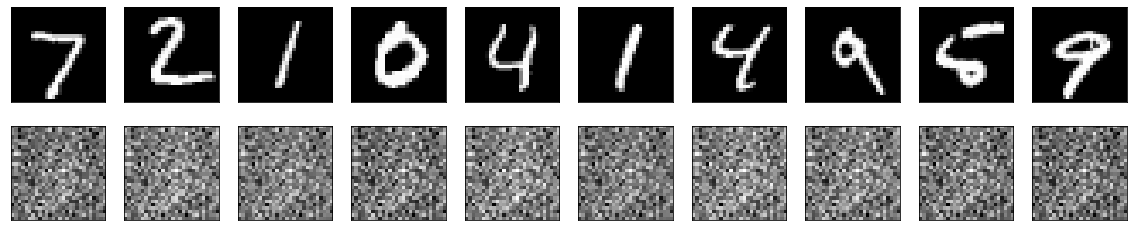

In [207]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [27]:
plt.show()